In [35]:
import pandas as pd
import dash
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import plotly.express as px

In [36]:
engine=create_engine("sqlite:///"+r"C:\Users\19193\Documents\BootCamp\Is_Starbucks_your_cup_of_coffee\Starbucks.sqlite")
conn=engine.connect()

In [38]:
result=pd.read_csv(r"C:\Users\19193\Documents\BootCamp\Is_Starbucks_your_cup_of_coffee\profile.csv")
result
result.describe()

,age,income
count,17000.000000,14825.000000
mean,62.531412,65404.991568
std,26.738580,21598.299410
min,18.000000,30000.000000
25%,45.000000,49000.000000
50%,58.000000,64000.000000
75%,73.000000,80000.000000
max,118.000000,120000.000000


In [4]:
result.dtypes
result['income'].isnull().sum()
result['gender'].isnull().sum()

2175

In [39]:
#drop null records where age=118 
result.drop(result[result.age==118].index, inplace=True)
result.describe()
result.isnull()

,gender,age,income
1,False,False,False
3,False,False,False
5,False,False,False
8,False,False,False
12,False,False,False
...,...,...,...
16995,False,False,False
16996,False,False,False
16997,False,False,False
16998,False,False,False


In [40]:
#create another variable and code F,M , O
result['sex']=result['gender'].replace(['F','M','O'],['Female','Male','Unknown'])
result

,gender,age,income,sex
1,F,55,112000.0,Female
3,F,75,100000.0,Female
5,M,68,70000.0,Male
8,M,65,53000.0,Male
12,M,58,51000.0,Male
...,...,...,...,...
16995,F,45,54000.0,Female
16996,M,61,72000.0,Male
16997,M,49,73000.0,Male
16998,F,83,50000.0,Female


In [41]:
#drop column
result.drop(['gender'],axis=1)


,age,income,sex
1,55,112000.0,Female
3,75,100000.0,Female
5,68,70000.0,Male
8,65,53000.0,Male
12,58,51000.0,Male
...,...,...,...
16995,45,54000.0,Female
16996,61,72000.0,Male
16997,49,73000.0,Male
16998,83,50000.0,Female


In [33]:
# result=result.drop_duplicates()
#result

,gender,age,income,sex
1,F,55,112000.0,Female
3,F,75,100000.0,Female
5,M,68,70000.0,Male
8,M,65,53000.0,Male
12,M,58,51000.0,Male
...,...,...,...,...
16950,F,26,65000.0,Female
16968,M,74,87000.0,Male
16973,M,30,57000.0,Male
16986,F,59,63000.0,Female


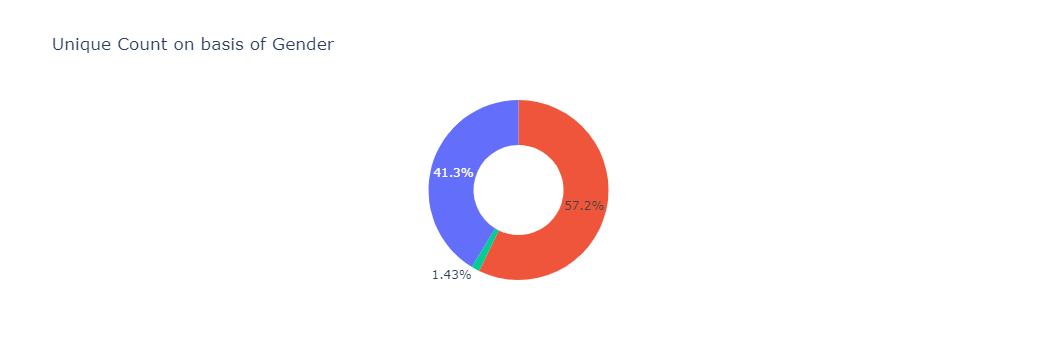

In [46]:
#
# Who usually spend more at Starbucks, female or male?
sum_t=result.groupby(['sex'], as_index=False)['income'].count().round(0)
sum_t.head()


fig = px.pie(sum_t, values='income' ,color='sex',title='Consumption on basis of Gender',
             labels={"sex":"Gender", "income":"Count"},hole=0.5)
fig.show()
fig.write_html("pisexcnt.html")

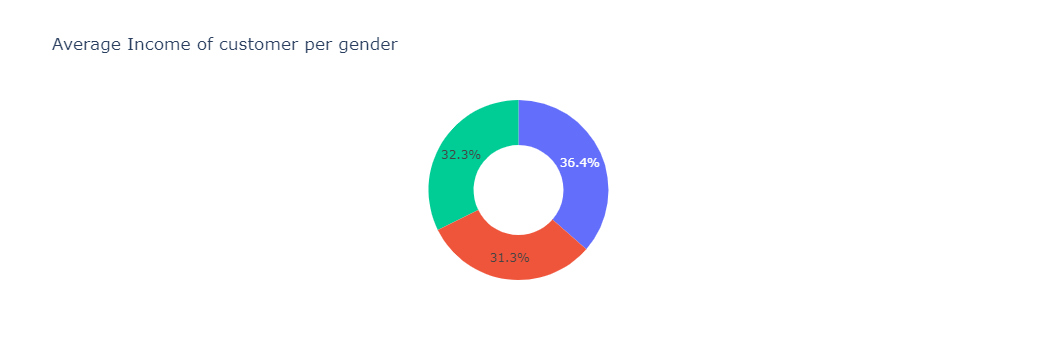

In [48]:
#
# For the customers who spend more; Who makes more income per year?
# We can see that, on average, male customers earn less than female customers do in a year. In fact,
# female customers earn more than the average income per year for all gender types. While female customers
# make, on average, around 71k a year, male customers make, on average, around 61k.
avg_i=result.groupby(['sex'], as_index=False)['income'].mean().round(0)

fig = px.pie(avg_i, values='income' ,color='sex',title='Average Income of customer per gender',
             labels={"sex":"Gender", "income":"Average Income"},hole=0.5)


# fig.update_traces(textposition='inside')
# fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()
fig.write_html("avgsexinc.html")

In [11]:
#find the ranges from above look at min /max value for age and income
pd.interval_range(start=18, freq=10, end=108, closed='left')
pd.interval_range(start=30000, freq=15000, end=120000, closed='left')


IntervalIndex([[30000, 45000), [45000, 60000), [60000, 75000), [75000, 90000), [90000, 105000), [105000, 120000)],
              closed='left',
              dtype='interval[int64]')

In [51]:
#create a range for ages
bins = [18, 30, 40, 50, 60, 70, 80, 90, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-90','90+'] 
result['age_range'] = pd.cut(result.age, bins, labels = labels,include_lowest = True)
result

,gender,age,income,sex,age_range
1,F,55,112000.0,Female,50-59
3,F,75,100000.0,Female,70-79
5,M,68,70000.0,Male,60-69
8,M,65,53000.0,Male,60-69
12,M,58,51000.0,Male,50-59
...,...,...,...,...,...
16995,F,45,54000.0,Female,40-49
16996,M,61,72000.0,Male,60-69
16997,M,49,73000.0,Male,40-49
16998,F,83,50000.0,Female,80-90


In [13]:
# percentage of age_range
age_range_percentage = result['age_range'].value_counts()/len(result['age_range'])*100 # calculates the percentages of all age ranges
age_range_percentage.head()

50-59    20.284602
60-69    18.123238
40-49    15.169821
70-79    13.639415
18-29    11.464626
Name: age_range, dtype: float64

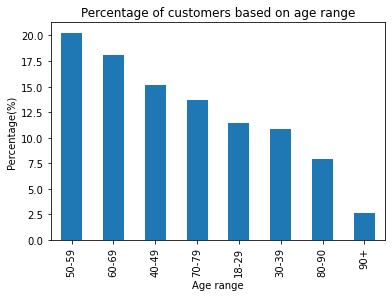

In [14]:
age_range_percentage.plot(kind="bar")
plt.title("Percentage of customers based on age range")
plt.ylabel("Percentage(%)")
plt.xlabel("Age range")
plt.show()
#We can see that, on average, male customers earn less than female customers do in a year. In fact,
# female customers earn more than the average income per year for all gender types. While female customers
# make, on average, around 71k a year, male customers make, on average, around 61k.


In [52]:
#create range for income
bin_i=[30000, 45000, 60000, 75000, 90000, 105000, 140000]
labels_i=['30000-44999', '45000-59999', '60000-74999', '75000-89999','90000-104999','120000+']
result['income_range'] = pd.cut(result.income, bins=bin_i, labels = labels_i,include_lowest = True) 

In [16]:
result.head()

,gender,age,income,sex,age_range,income_range
1,F,55,112000.0,Female,50-59,120000+
3,F,75,100000.0,Female,70-79,90000-104999
5,M,68,70000.0,Male,60-69,60000-74999
8,M,65,53000.0,Male,60-69,45000-59999
12,M,58,51000.0,Male,50-59,45000-59999


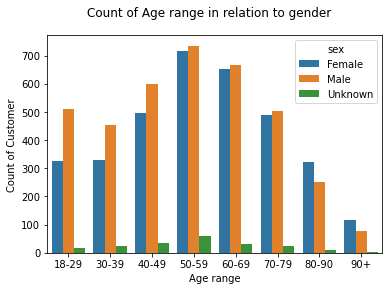

In [17]:
# countplot plots the count of the number of records by category
cnt = sns.countplot(x="age_range", hue="sex", data=result) # plots a bar chart 
cnt.set(xlabel= "Age range", ylabel= "Count of Customer") # labels axis
plt.suptitle("Count of Age range in relation to gender"); # title of plot


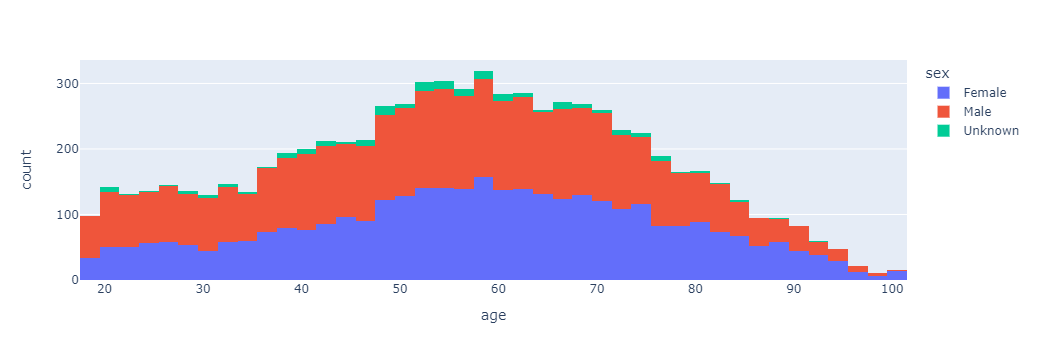

In [18]:
result.sort_values(
 by="age",
ascending=False
)
fig = px.histogram(result, x='age',color='sex')
fig.show()

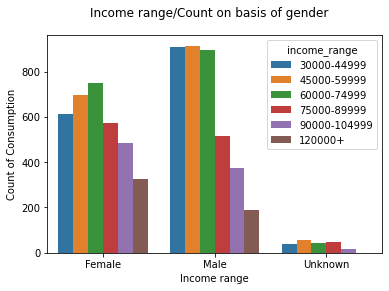

In [19]:
# countplot plots the count of the number of records by category
cnt = sns.countplot(x="sex", hue="income_range", data=result) # plots a bar chart 
cnt.set(xlabel= "Income range", ylabel= "Count of Consumption") # labels axis
plt.suptitle("Income range/Count on basis of gender"); # title of plot


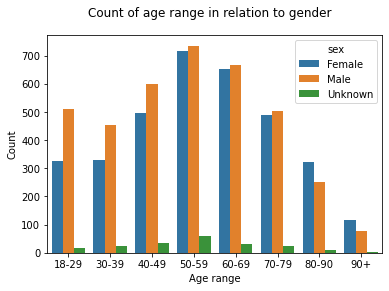

In [20]:
cnt = sns.countplot(x="age_range", hue="sex", data=result) # plots a bar chart 
cnt.set(xlabel= "Age range", ylabel= "Count") # labels axis
plt.suptitle("Count of age range in relation to gender"); # title of plot

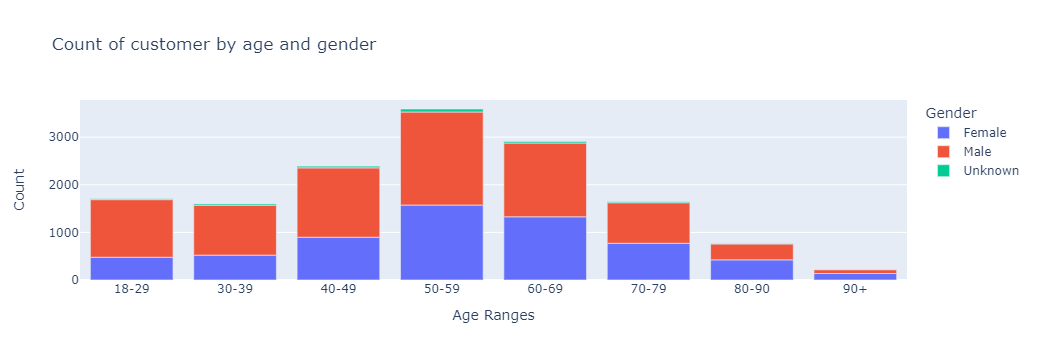

In [53]:
#get count on basis of age_range and sex;
#Who usually spend more at Starbucks, female or male?
group = result.groupby(['age_range', 'sex'])
  
# size of group to count observations
group = group.size()
group.head()
  
# make a column name 
grp=group.reset_index(name='count')


fig = px.bar(grp, x="age_range", y="count", color="sex", title="Count of customer by age and gender",
    labels={ "sex": "Gender",  "age_range": "Age Ranges", "count": "Count"})
fig.show()
fig.write_html("agerange_sex.html")

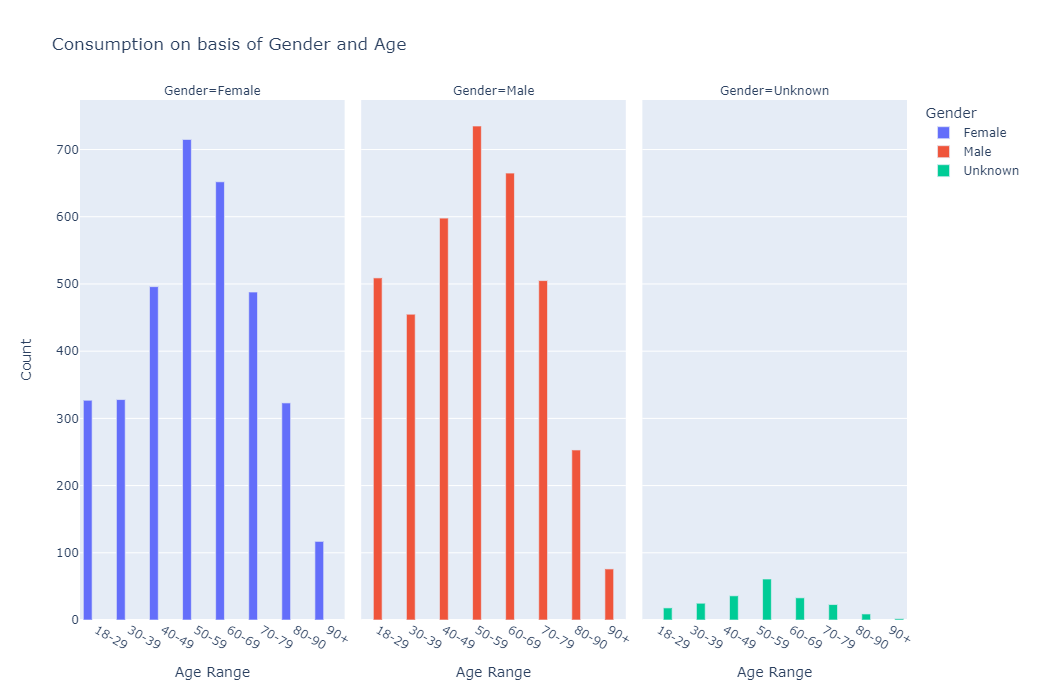

In [22]:
fig = px.bar(grp, x="age_range", color="sex",
             y='count',
             title="Consumption on basis of Gender and Age",
             barmode='group',
             height=700,
             facet_col="sex",
             labels={"sex":"Gender", "count":"Count","age_range":"Age Range"}
            )

fig.show()
fig.write_html("IndGenAge.html")

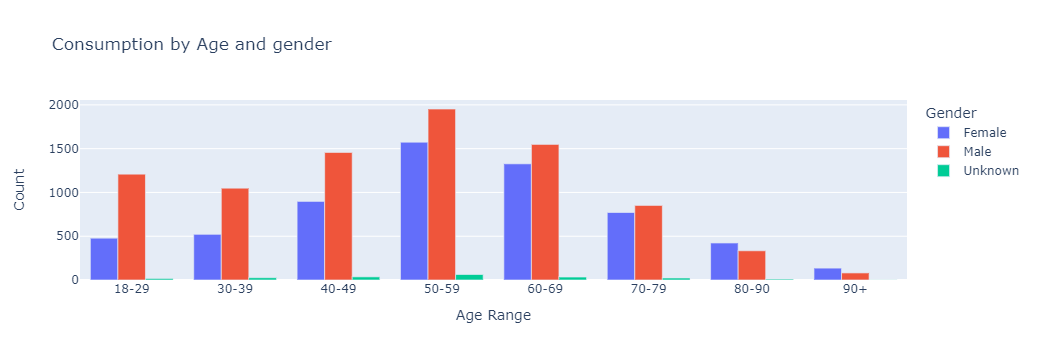

In [55]:
#How old are most of Starbucks customers with respect to gender?
#As you can notice that at age below 80, more cosumption of starbucks is done by Male but 
#after age 80 on average, female are consuming more. Majority of consumption is done by 40-70 years old.
coustmer ate older than male .
fig = px.bar(grp, x="age_range", y="count",title="Consumption by Age and gender",
             color='sex', barmode='group', labels={"sex":"Gender", "count":"Count","age_range":"Age Range"})
fig.show()
fig.write_html("barAgeSex.html") 

In [24]:
result.head()

,gender,age,income,sex,age_range,income_range
1,F,55,112000.0,Female,50-59,120000+
3,F,75,100000.0,Female,70-79,90000-104999
5,M,68,70000.0,Male,60-69,60000-74999
8,M,65,53000.0,Male,60-69,45000-59999
12,M,58,51000.0,Male,50-59,45000-59999


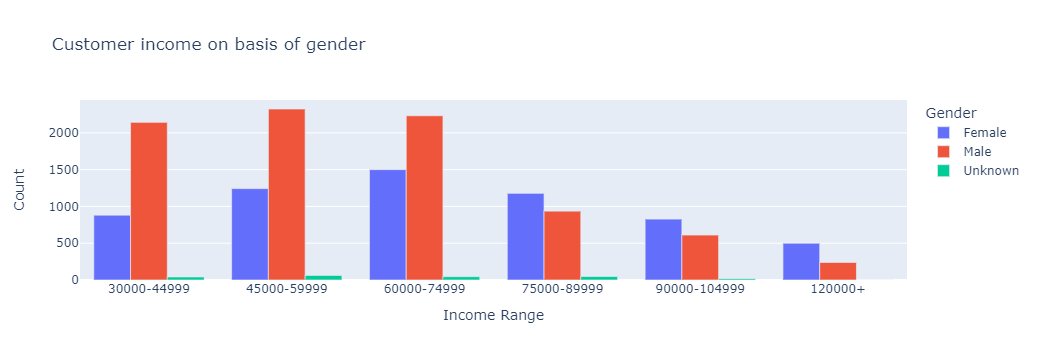

In [58]:
#get count on basis of age_range and sex;
group = result.groupby(['income_range', 'sex'])
  
# size of group to count observations
group = group.size()
  
# make a column name 
grp_income=group.reset_index(name='count')
grp_income

fig = px.bar(grp_income, x="income_range", y="count",
             color='sex', barmode='group',title='Customer Income on basis of gender',
             labels={'sex':'Gender','count':'Count ',"income_range":"Income Range"})
fig.show()
fig.write_html("barIncomeAGe.html")

In [59]:
fig = px.pie(grp_income, values='count', names='income', title='Customer Income Count')
fig.show()


ValueError: Value of 'names' is not the name of a column in 'data_frame'. Expected one of ['income_range', 'sex', 'count'] but received: income

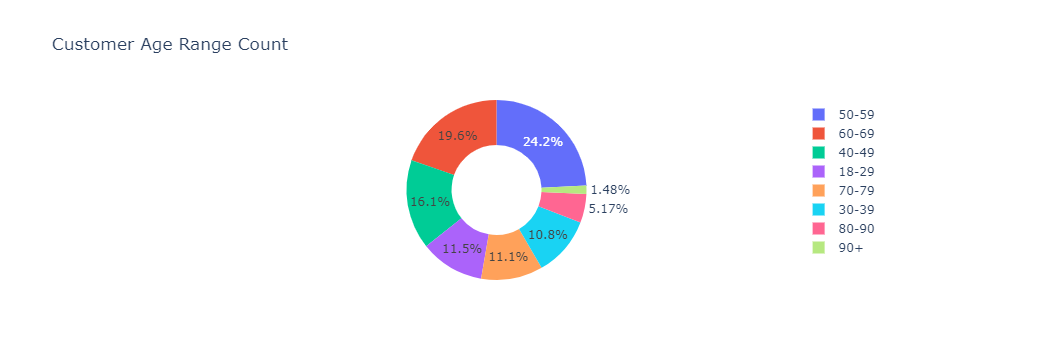

In [60]:
fig = px.pie(grp, values='count', names='age_range', title='Customer Age Range Count',hole=0.5, labels={'count':'Count',"income_range":"Income Range"})
fig.show()
fig.write_html("pieage.html")


In [ ]:
2. Who usually spend more at Starbucks, female or male?
3. For the customers who spend more; Who makes more income per year?
4. How old are most of Starbucks customers with respect to gender?

2. Who usually spend more at Starbucks, female or male?
3. For the customers who spend more; Who makes more income per year?
4. How old are most of Starbucks customers with respect to gender?

In [ ]:
We can see that, on average, male customers earn less than female customers do in a year.
In fact, female customers earn more than the average income per year for all gender types.
While female customers make, on average, around 71k a year, male customers make, on average, around 61k.

In [ ]:
avg_i=result.groupby(['sex'], as_index=False)['income'].mean()
fig = px.pie(avg_i, values='income' ,color='sex',title='Average Income of customer per gender',
             labels={"sex":"Gender", "income":"Average Income"},hole=0.5)
fig.show()
fig.write_html("avgagesex.html")

In [ ]:
fig = px.pie(grp_income, values='count', names='', title='Customer Income Count')
fig.show()


In [ ]:
avg_t=result.groupby(['sex'], as_index=False)['age'].mean()
fig = px.pie(avg_t, values='age' ,color='sex',title='Average Age of customer per gender',
             labels={"sex":"Gender", "age":"Average Age"},hole=0.5)
fig.show()
fig.write_html("avgagesex.html")